# PROMOTION EFFECTIVENESS PROJECT

## Main Goal : 
Measure the effects of promotion on sales and give recommendations to marketing department for future promotion campaigns. 

### Goal A:<br>

Your goal is to model the effect of promotion on products and stores. At this stage only use the  data in the file Assignment4.1a.csv and base your model using the first 4 promotions. <br><br>
        Questions:<br>
		a. What are your criteria for separating Fast, Medium and Slow items? Why?<br>
		b. What are your criteria for separating Fast, Medium and Slow Stores? Why?<br>
		c. Which items experienced the biggest sale increase during promotions?<br>
		d. Are there stores that have higher promotion reaction?<br>
		e. What is the biggest effect explaining sales change during promotions?<br>
		f. Is there any significant difference between promotion impacts of the Fast versus Slow items?<br>
		g. Is there any significant difference between promotion impacts of the Fast versus Slow stores?<br>
	
### Goal B:	<br>
Test model results with test dataset. Based on the model developed in part A forecast what would the effect of promotion 5 will be on sample store – item pairs. Compare your forecasts results for promotion5 with the real observed sales during that period.<br><br>
        Questions:<br>
		a.What measure would you use for goodness of fit?<br>
		b.How good is your model developed in step 1?<br>
		c.What are the main problem points causing bad fits?<br>
		d.What would you change in step 1?<br>
        
### Report:	<br>

a. Make recommendations. <br>
b. Show your work by providing code.<br>
c. Report statistics for all models used. <br>
d. Interpret results. <br>
e. Is there any data set that you would like to use in addition to tables provided for this assignment? What are those data sets? How would you obtain them?<br><br>
		         
### Bonus:<br><br>

Is there any significant difference in item return rates after promotions?<br><br>

------------------------------------------------------------------------------------------------------------------------------<br>

## Solution <br><br>

### Steps: <br>

   1. EDA - Data Preprocessing <br>
        Missing data <br>
		Distributions<br>
		Outliers<br>
		Statistical Summary<br><br>
   2. Clustering - Goal A<br>
		Products as slow,mid,fast<br>
		Stores as slow,mid,fast<br><br>
   3. Promotion Effectiveness<br>
   4. Prediction model - Goal B<br>
	


In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm

In [2]:
# Importing datasets

Sales_Train=pd.read_csv('SalesTrain.csv')
Sales_Test=pd.read_csv('SalesTest.csv')
Promotion_Dates=pd.read_csv('PromotionDates.csv')
Product_Groups=pd.read_csv('Product Groups.csv')

# Merging datasets needed

Train_Data=pd.merge(Sales_Train,Product_Groups,on='ProductCode',how='left')  #Adding product groups
Test_Data=pd.merge(Sales_Test,Product_Groups,on='ProductCode',how='left')

## 1.EDA - Data Preprocessing

In [3]:
Train_Data.describe()

,StoreCode,ProductCode,SalesQuantity,ProductGroup2
count,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00,1.175232e+01
std,1.014606e+02,7.773282e+01,5.028994e+00,8.605154e+00
min,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00
25%,8.100000e+01,1.050000e+02,0.000000e+00,5.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00,6.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00,1.900000e+01
max,3.400000e+02,3.170000e+02,9.120000e+02,3.000000e+01


In [4]:
# Missing data

total = Train_Data.isnull().sum().sort_values(ascending=False)
percent = (Train_Data.isnull().sum()/Train_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
ProductGroup2,0,0.0
ProductGroup1,0,0.0
SalesQuantity,0,0.0
ProductCode,0,0.0
StoreCode,0,0.0
Date,0,0.0


In [5]:
# Missing data

total = Test_Data.isnull().sum().sort_values(ascending=False)
percent = (Test_Data.isnull().sum()/Test_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
ProductGroup2,0,0.0
ProductGroup1,0,0.0
SalesQuantity,0,0.0
ProductCode,0,0.0
StoreCode,0,0.0
Date,0,0.0


It is great! We do not have any.

In [6]:
# Unique values

for column in Train_Data.columns:
    uniques = sorted(Train_Data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

Date                   212	 ['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05']
StoreCode              340	 [1, 2, 3, 4, 5]
ProductCode            317	 [1, 2, 3, 4, 5]
SalesQuantity          177	 [-60, -48, -40, -36, -35]
ProductGroup1           10	 ['A', 'B', 'C', 'D', 'E']
ProductGroup2           30	 [1, 2, 3, 4, 5]


#### Adding some metrics to answer the questions about Returns and Promotions

In [7]:
Promotion_Dates

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015
5,Promo6,20/11/2015,27/11/2015


In [11]:
# Converting Training and test data date columns
Train_Data['Date'] = Train_Data['Date'].astype(str)
Train_Data['Date']=Train_Data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

Test_Data['Date'] = Test_Data['Date'].astype(str)
Test_Data['Date']= Test_Data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# Converting Promotion data date columns
Promotion_Dates_Train=Promotion_Dates.head(4)
Promotion_Dates_Test=Promotion_Dates.tail(2)

Promotion_Dates_Train['StartDate']=Promotion_Dates_Train['StartDate'].astype(str)
Promotion_Dates_Train['StartDate']=Promotion_Dates_Train['StartDate'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
Promotion_Dates_Train['EndDate']=Promotion_Dates_Train['EndDate'].astype(str)
Promotion_Dates_Train['EndDate']=Promotion_Dates_Train['EndDate'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

Promotion_Dates_Test['StartDate']=Promotion_Dates_Test['StartDate'].astype(str)
Promotion_Dates_Test['StartDate']=Promotion_Dates_Test['StartDate'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
Promotion_Dates_Test['EndDate']=Promotion_Dates_Test['EndDate'].astype(str)
Promotion_Dates_Test['EndDate']=Promotion_Dates_Test['EndDate'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))

In [9]:
Promotion_Dates_Train

,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28


In [13]:
Promotion_Dates_Test

,Period,StartDate,EndDate
4,Promo5,2015-09-01,2015-09-06
5,Promo6,2015-11-20,2015-11-27


In [14]:
# Defining conditions

# Promotion
Train_Data['IsPromotion'] = np.where((Promotion_Dates_Train['StartDate'][Promotion_Dates_Train['Period']=='Promo1'].values<=Train_Data['Date'].values) & (Train_Data['Date'].values<=Promotion_Dates_Train['EndDate'][Promotion_Dates_Train['Period']=='Promo1'].values),1,0)
Train_Data.loc[(Promotion_Dates_Train['StartDate'][Promotion_Dates_Train['Period']=='Promo2'].values<=Train_Data['Date'].values) & (Train_Data['Date'].values<=Promotion_Dates_Train['EndDate'][Promotion_Dates_Train['Period']=='Promo2'].values), ['IsPromotion']] = 1
Train_Data.loc[(Promotion_Dates_Train['StartDate'][Promotion_Dates_Train['Period']=='Promo3'].values<=Train_Data['Date'].values) & (Train_Data['Date'].values<=Promotion_Dates_Train['EndDate'][Promotion_Dates_Train['Period']=='Promo3'].values), ['IsPromotion']] = 1
Train_Data.loc[(Promotion_Dates_Train['StartDate'][Promotion_Dates_Train['Period']=='Promo4'].values<=Train_Data['Date'].values) & (Train_Data['Date'].values<=Promotion_Dates_Train['EndDate'][Promotion_Dates_Train['Period']=='Promo4'].values), ['IsPromotion']] = 1

Test_Data['IsPromotion'] = np.where((Promotion_Dates_Test['StartDate'][Promotion_Dates_Test['Period']=='Promo5'].values<=Test_Data['Date'].values) & (Test_Data['Date'].values<=Promotion_Dates_Test['EndDate'][Promotion_Dates_Test['Period']=='Promo5'].values),1,0)
Test_Data.loc[(Promotion_Dates_Test['StartDate'][Promotion_Dates_Test['Period']=='Promo6 '].values<=Test_Data['Date'].values) & (Test_Data['Date'].values<=Promotion_Dates_Test['EndDate'][Promotion_Dates_Test['Period']=='Promo6 '].values), ['IsPromotion']] = 1

# Return        
Train_Data['IsReturn'] = np.where(Train_Data['SalesQuantity']<0,1,0)
Test_Data['IsReturn'] = np.where(Test_Data['SalesQuantity']<0,1,0)

# Adding Return Quantity
Train_Data['ReturnQuantity']= np.where(Train_Data['SalesQuantity']<0,Train_Data['SalesQuantity']*-1,0)
Test_Data['ReturnQuantity']= np.where(Test_Data['SalesQuantity']<0,Test_Data['SalesQuantity']*-1,0)

In [15]:
Train_Data.describe()

,StoreCode,ProductCode,SalesQuantity,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity
count,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00,1.175232e+01,1.659479e-01,5.160604e-03,1.096221e-02
std,1.014606e+02,7.773282e+01,5.028994e+00,8.605154e+00,3.720340e-01,7.165176e-02,3.135703e-01
min,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.100000e+01,1.050000e+02,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,3.400000e+02,3.170000e+02,9.120000e+02,3.000000e+01,1.000000e+00,1.000000e+00,6.000000e+01


Text(0.5, 1.0, 'Return')

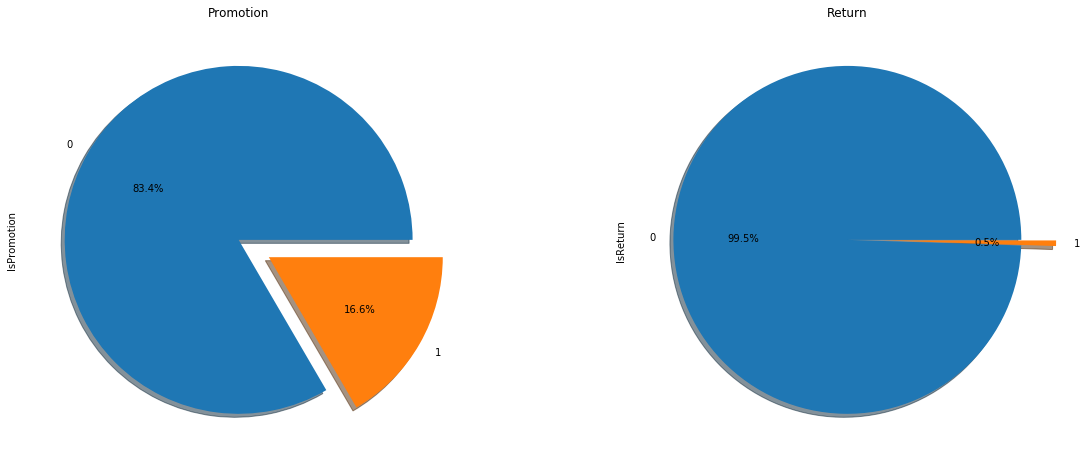

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Train_Data['IsPromotion'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
Train_Data['IsReturn'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Promotion')
ax[1].set_title('Return')

{'whiskers': [<matplotlib.lines.Line2D at 0x21501291e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2150129f710>,
 'boxes': [<matplotlib.lines.Line2D at 0x21501291cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2150129fda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2150129fe80>],
 'means': []}

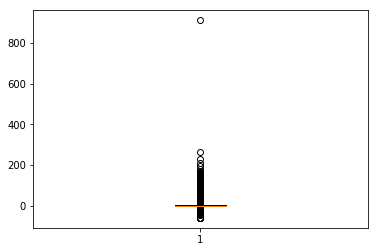

In [17]:
plt.boxplot(Train_Data.SalesQuantity)

In [18]:
# Checking the outlier value
Train_Data[Train_Data['SalesQuantity']>800]

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity
1354290,2015-03-21,256,218,912,A,5,1,0,0


Let's take quick look at this product's normal sales volume to sure that observation is really outlier and we should drop that.

{'whiskers': [<matplotlib.lines.Line2D at 0x27e890369b0>,
 'caps': [<matplotlib.lines.Line2D at 0x27e89036f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e89036320>],
 'medians': [<matplotlib.lines.Line2D at 0x27e89041cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e89041c18>],
 'means': []}

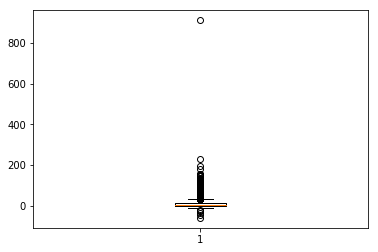

In [926]:
# Boxplotting
plt.boxplot(Train_Data[Train_Data['ProductCode']==218].SalesQuantity)

{'whiskers': [<matplotlib.lines.Line2D at 0x215010b1b00>,
 'caps': [<matplotlib.lines.Line2D at 0x215010e6588>,
 'boxes': [<matplotlib.lines.Line2D at 0x215010dcac8>],
 'medians': [<matplotlib.lines.Line2D at 0x215010e6c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x215010e6f60>],
 'means': []}

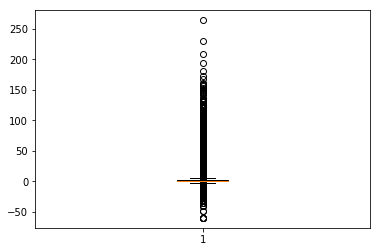

In [19]:
# Yes it is an outlier. So let's drop that.

Train_Data = Train_Data.drop(Train_Data[Train_Data['SalesQuantity']>800].index)

# Take a look whole Sales again
plt.boxplot(Train_Data.SalesQuantity)

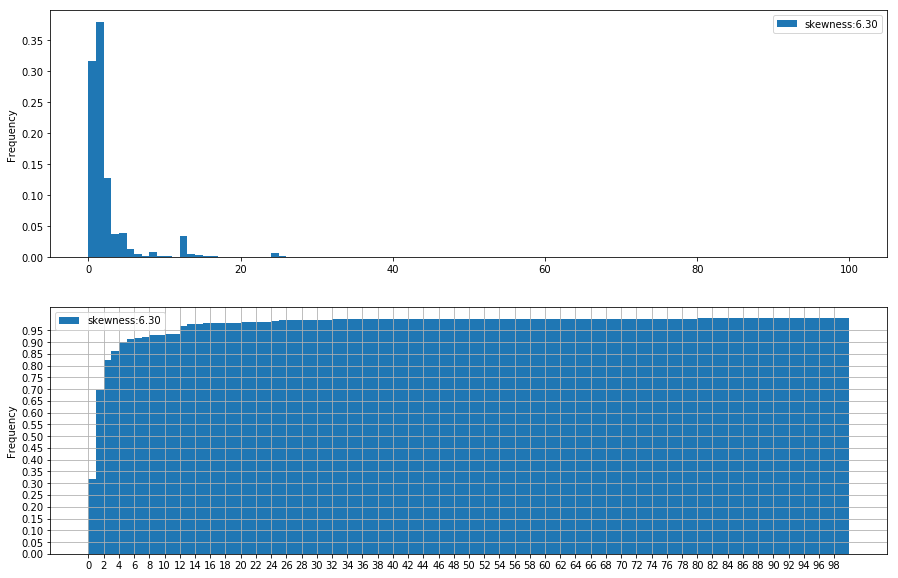

In [20]:
# histogram subplot with non cumulative and cumulative

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(15, 10))
Train_Data.plot(kind = "hist",label='skewness:{:.2f}'.format(Train_Data['SalesQuantity'].skew()),y = "SalesQuantity",bins = 100,range= (0,100),normed = True,ax = axes[0])
Train_Data.plot(kind = "hist",label='skewness:{:.2f}'.format(Train_Data['SalesQuantity'].skew()),y = "SalesQuantity",bins = 100,range= (0,100),normed = True,ax = axes[1],cumulative = True)
plt.xticks(np.arange(0, 100, step=2))
plt.yticks(np.arange(0, 1, step=0.05))
plt.savefig('graph.png')
plt.grid()
plt.show()

As we can see, almost 32% of observations have no sales and %70 has equal or less than 2. Also,skewness is extremely high. These may cause to low variance and high bias overfiting problem in next steps. Predictions could  tend to zero.For now, let's continue to explore the data and will turn back to this in data preprocessing part.


### Exploring Product Groups

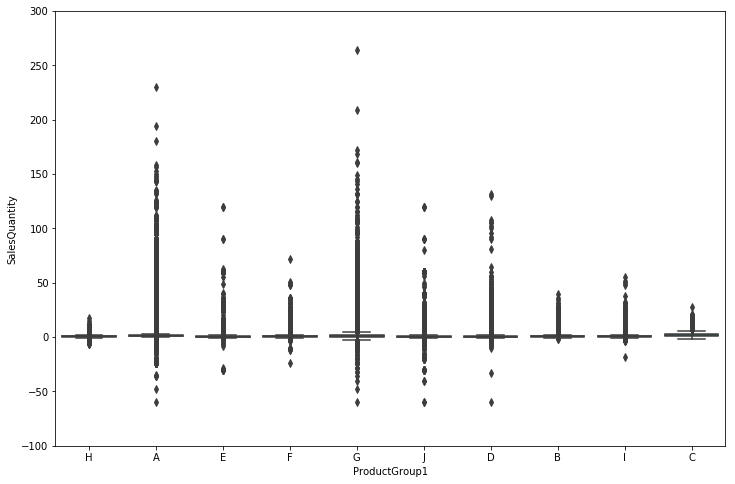

In [929]:
# Relationship with categorical features
# Boxplot ProductGroup1/SalesQuantity

var = 'ProductGroup1'
data = pd.concat([Train_Data['SalesQuantity'], Train_Data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="SalesQuantity", data=Train_Data)
fig.axis(ymin=-100, ymax=300);

*Note*: Some of ProductGroup1's have high variance on sales like A,G,D groups. These groups may be most effected groups by promotion. That is just a foresight but We will test that hypothesis.

### Exploring Stores

Text(0, 0.5, 'Sales Units')

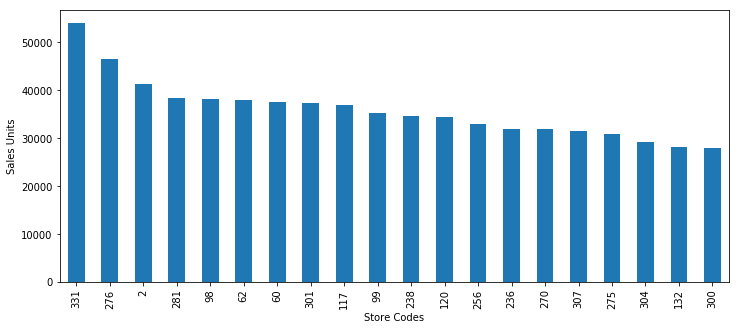

In [930]:
# Displaying Top20 stores that have a high sales volume

fig = plt.figure(figsize=(12,5))
StoreSales = Train_Data.groupby('StoreCode')['SalesQuantity'].sum().nlargest(20).plot(kind='bar')
StoreSales.set_xlabel("Store Codes")
StoreSales.set_ylabel("Sales Units")

There is not a big differences between stores sales volumes.

In [931]:
Train_Data.groupby('StoreCode')['SalesQuantity'].sum().describe()

count      340.000000
mean     12377.700000
std       7799.115717
min          0.000000
25%       7749.000000
50%       9944.000000
75%      15120.500000
max      54059.000000
Name: SalesQuantity, dtype: float64

Okay there is low variance because of (Standart deviation / mean)<1 . Also, We have no sales stores. Let's take a loook at them

In [21]:
NoSalesStores=Train_Data[Train_Data['IsReturn']==0]
NoSalesStores=NoSalesStores.groupby('StoreCode')['SalesQuantity'].sum()[Train_Data.groupby('StoreCode')['SalesQuantity'].sum()==0]
NoSalesStores

StoreCode
19     0
152    0
169    0
227    0
Name: SalesQuantity, dtype: int64

In [22]:
# Dropping No sales stores.

Train_Data = Train_Data.drop(Train_Data[Train_Data['StoreCode']==19].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['StoreCode']==152].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['StoreCode']==169].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['StoreCode']==227].index)

NoSalesStores=Train_Data.groupby('StoreCode')['SalesQuantity'].sum()[Train_Data.groupby('StoreCode')['SalesQuantity'].sum()==0]
NoSalesStores

Series([], Name: SalesQuantity, dtype: int64)

Text(0, 0.5, 'Sales Units')

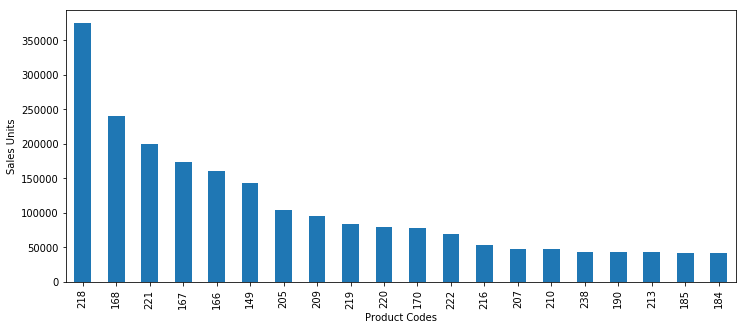

In [934]:
# Displaying Top20 products that have a high sales volume

fig = plt.figure(figsize=(12,5))
StoreSales = Train_Data.groupby('ProductCode')['SalesQuantity'].sum().nlargest(20).plot(kind='bar')
StoreSales.set_xlabel("Product Codes")
StoreSales.set_ylabel("Sales Units")

In [935]:
Train_Data.groupby('ProductCode')['SalesQuantity'].sum().describe()

count       317.000000
mean      13275.766562
std       33337.965003
min          -3.000000
25%         579.000000
50%        5978.000000
75%       10770.000000
max      374866.000000
Name: SalesQuantity, dtype: float64

There is a high variance on sales by products.

In [936]:
# Checking products too
NoSalesProducts=Train_Data[Train_Data['IsReturn']==0]
NoSalesProducts=NoSalesProducts.groupby('ProductCode')['SalesQuantity'].sum()[Train_Data.groupby('ProductCode')['SalesQuantity'].sum()==0]
NoSalesProducts

ProductCode
49     0
183    0
261    0
310    0
Name: SalesQuantity, dtype: int64

In [23]:
# Dropping No sales products.

Train_Data = Train_Data.drop(Train_Data[Train_Data['ProductCode']==49].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['ProductCode']==183].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['ProductCode']==261].index)
Train_Data = Train_Data.drop(Train_Data[Train_Data['ProductCode']==310].index)

NoSalesProducts=Train_Data.groupby('ProductCode')['SalesQuantity'].sum()[Train_Data.groupby('ProductCode')['SalesQuantity'].sum()==0]
NoSalesProducts

Series([], Name: SalesQuantity, dtype: int64)

We should convert date columns to datetime as the same format

Text(0, 0.5, 'Return Quantity')

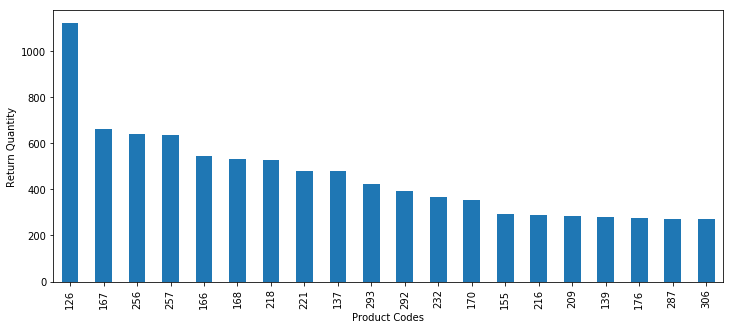

In [938]:
# Displaying Top 20 products that have a high Return Quantity

fig = plt.figure(figsize=(12,5))
ProductReturns = Train_Data.groupby('ProductCode')['ReturnQuantity'].sum().nlargest(20).plot(kind='bar')
ProductReturns.set_xlabel("Product Codes")
ProductReturns.set_ylabel("Return Quantity")


Text(0, 0.5, 'Return Rate')

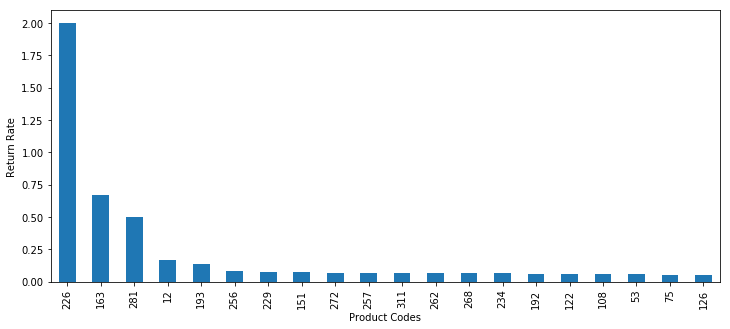

In [939]:
# Displaying Top 20 products that have a high Return/Sales Quantity

Sales=Train_Data[Train_Data['SalesQuantity']>0]
ReturnRates=(Train_Data.groupby('ProductCode')['ReturnQuantity'].sum())/(Sales.groupby('ProductCode')['SalesQuantity'].sum())
fig = plt.figure(figsize=(12,5))
ProductReturnRate = ReturnRates.nlargest(20).plot(kind='bar')
ProductReturnRate.set_xlabel("Product Codes")
ProductReturnRate.set_ylabel("Return Rate")


Text(0, 0.5, 'Return Rate')

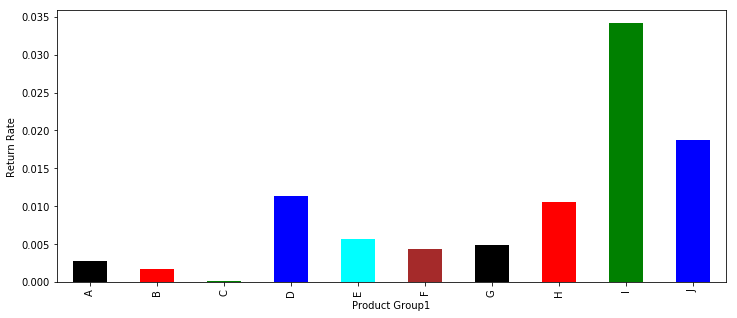

In [940]:
# Displaying Top 20 products that have a high Return/Sales Quantity

Sales=Train_Data[Train_Data['SalesQuantity']>0]
ReturnRates=(Train_Data.groupby('ProductGroup1')['ReturnQuantity'].sum())/(Sales.groupby('ProductGroup1')['SalesQuantity'].sum())
fig = plt.figure(figsize=(12,5))
ProductReturnRate = ReturnRates.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan', 'brown'])
ProductReturnRate.set_xlabel("Product Group1")
ProductReturnRate.set_ylabel("Return Rate")

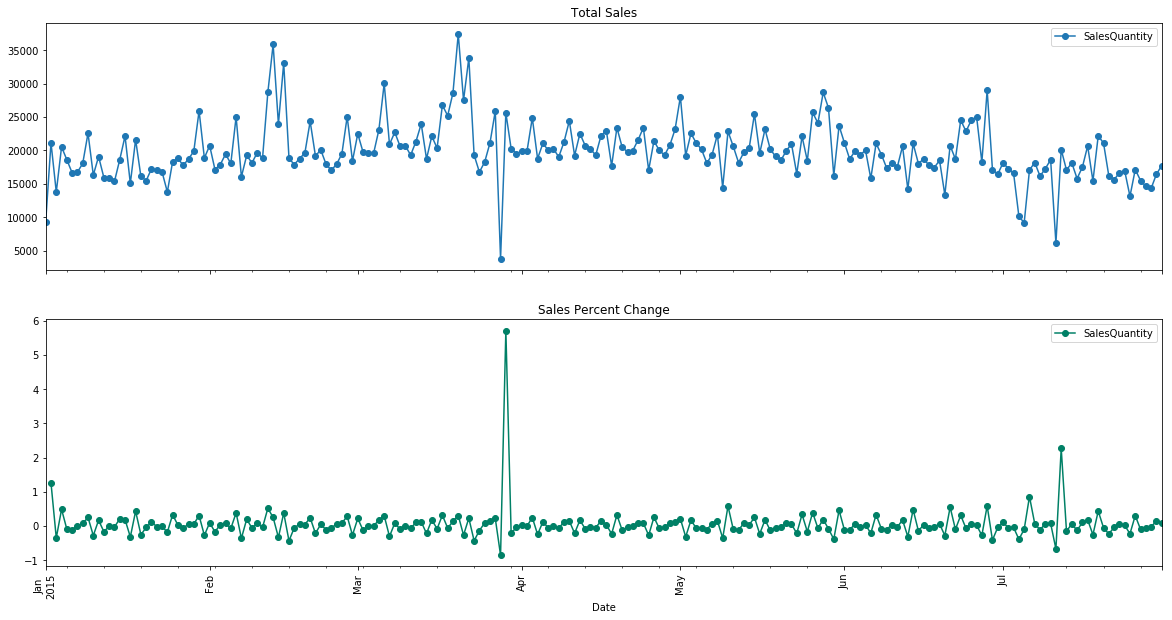

In [941]:
# group by date and get average sales, and precent change
total_sales    = Train_Data.groupby('Date')["SalesQuantity"].sum()
pct_change_sales = Train_Data.groupby('Date')["SalesQuantity"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
# plot average sales over time(year-month)
ax1 = total_sales.plot(legend=True,ax=axis1,marker='o',title="Total Sales")
ax1.set_xticks(range(len(total_sales)))
ax1.set_xticklabels(total_sales.index.tolist(), rotation=90)
# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

There are 2 peak points we need to analyze. One of them about end of March and other one is middle of July.

## CLUSTERING

## Store Clustering

In [24]:
Clustering_Data=Train_Data[Train_Data['IsPromotion']==0]
Clustering_Data=Clustering_Data[Clustering_Data['IsReturn']==0]
Clustering_Data=Clustering_Data[['Date','StoreCode','ProductCode','SalesQuantity']]
Clustering_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0
5,2015-01-01,273,9,1


In [25]:
# Getting Week number of dates
Clustering_Data['Week_Number'] = Clustering_Data['Date'].dt.week

In [26]:
# Getting data to store-Week level
Clustering_Data=Clustering_Data.groupby(['StoreCode', 'Week_Number'])['SalesQuantity'].sum()
Clustering_Data = Clustering_Data.reset_index()
Clustering_Data.columns = ['StoreCode','Week_Number','Weekly_Sales']

Clustering_Data.head()

,StoreCode,Week_Number,Weekly_Sales
0,1,1,119
1,1,2,471
2,1,3,323
3,1,4,397
4,1,5,556


In [27]:
#Adding Weekly Total Sales of whole stores
Clustering_Data['Weekly_Total_Sales'] = Clustering_Data['Weekly_Sales'].groupby(Clustering_Data['Week_Number']).transform('sum')


#Adding Share of each store of each week
Clustering_Data['Weekly_Sales_Share']=Clustering_Data['Weekly_Sales']/Clustering_Data['Weekly_Total_Sales']


#Adding Average Share of weekly sales for each store and Average Weekly Sales
Clustering_Data['Average_Weekly_Share_Store_OffPromotion'] = Clustering_Data['Weekly_Sales_Share'].groupby(Clustering_Data['StoreCode']).transform('mean')
Clustering_Data['Average_Weekly_Sales_Store_OffPromotion'] = Clustering_Data['Weekly_Sales'].groupby(Clustering_Data['StoreCode']).transform('mean')

Clustering_Data.head()

,StoreCode,Week_Number,Weekly_Sales,Weekly_Total_Sales,Weekly_Sales_Share,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,1,1,119,65139,0.001827,0.002977,371.75
1,1,2,471,128687,0.003660,0.002977,371.75
2,1,3,323,125303,0.002578,0.002977,371.75
3,1,4,397,115514,0.003437,0.002977,371.75
4,1,5,556,141440,0.003931,0.002977,371.75


In [28]:
# Getting dataframe ready to be clustered
Clustering_Data=Clustering_Data.groupby(['StoreCode']).agg({'Average_Weekly_Share_Store_OffPromotion':'mean','Average_Weekly_Sales_Store_OffPromotion':'mean'})
Clustering_Data = Clustering_Data.reset_index()
Clustering_Data.columns = ['StoreCode','Average_Weekly_Share_Store_OffPromotion','Average_Weekly_Sales_Store_OffPromotion']
Clustering_Data.head()

,StoreCode,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,1,0.002977,371.750000
1,2,0.009872,1212.821429
2,3,0.001974,244.535714
3,4,0.003016,376.857143
4,5,0.002541,305.392857


In [29]:
# Adding Weekly Sales and shares of store to Train_Data. These metrics will be used on promotion effects.

Train_Data=pd.merge(Train_Data,Clustering_Data,on='StoreCode',how='left')
Test_Data=pd.merge(Test_Data,Clustering_Data,on='StoreCode',how='left')
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429


In [30]:
Clustering_Data.describe()

,StoreCode,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
count,336.000000,336.000000,336.000000
mean,170.842262,0.003027,369.189020
std,98.477615,0.001844,224.293346
min,1.000000,0.000657,75.428571
25%,85.750000,0.001864,228.660714
50%,171.500000,0.002407,294.000000
75%,256.250000,0.003621,438.312500
max,340.000000,0.012714,1547.892857


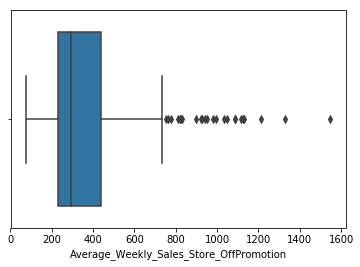

In [31]:
sns.boxplot(Clustering_Data['Average_Weekly_Sales_Store_OffPromotion'])

In [32]:
Clustering_Data[Clustering_Data['Average_Weekly_Sales_Store_OffPromotion']>1000]

,StoreCode,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
1,2,0.009872,1212.821429
58,60,0.008961,1085.750000
60,62,0.009200,1116.500000
96,98,0.009306,1125.857143
97,99,0.008555,1049.678571
115,117,0.008476,1035.071429
271,276,0.010971,1329.035714
276,281,0.009363,1128.321429
296,301,0.008937,1087.178571
326,331,0.012714,1547.892857


In [33]:
Clustering_Data=Clustering_Data[Clustering_Data['Average_Weekly_Sales_Store_OffPromotion']<1000]

In [34]:
# Feature Scaling
Clustering_Data_Fs=Clustering_Data.values
sc = StandardScaler()
Clustering_Data_Fs = sc.fit_transform(Clustering_Data_Fs[:,1:])

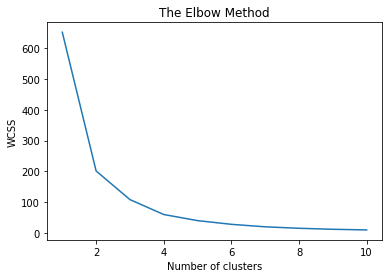

In [35]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(Clustering_Data_Fs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
del i,wcss

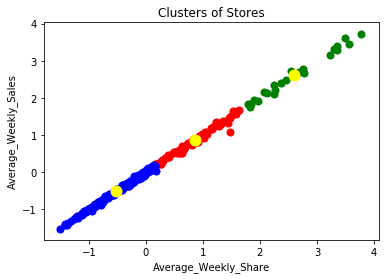

In [36]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(Clustering_Data_Fs)


# Visualising the clusters

plt.scatter(Clustering_Data_Fs[y_kmeans == 0, 0], Clustering_Data_Fs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Clustering_Data_Fs[y_kmeans == 1, 0], Clustering_Data_Fs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Clustering_Data_Fs[y_kmeans == 2, 0], Clustering_Data_Fs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Stores')
plt.xlabel('Average_Weekly_Share')
plt.ylabel('Average_Weekly_Sales')
#plt.legend()
plt.show()

In [37]:
# Merging CLusters with data

y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
Merged=np.hstack((Clustering_Data, y_kmeans))
Merged=pd.DataFrame(Merged)
Merged.columns=['StoreCode','Average_Weekly_Share_Store_OffPromotion','Average_Weekly_Sales_Store_OffPromotion','Cluster']
Merged.head()

,StoreCode,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Cluster
0,1.0,0.002977,371.750000,1.0
1,3.0,0.001974,244.535714,1.0
2,4.0,0.003016,376.857143,1.0
3,5.0,0.002541,305.392857,1.0
4,6.0,0.003874,479.250000,0.0


In [38]:
# Summary of Clusters

Store_Clusters=Merged.groupby(['Cluster']).agg({'StoreCode':'count','Average_Weekly_Share_Store_OffPromotion':'mean','Average_Weekly_Sales_Store_OffPromotion':'mean'})
Store_Clusters = Store_Clusters.reset_index()
Store_Clusters.columns = ['Cluster','StoreCount','Average_Weekly_Share_Store_OffPromotion','Average_Weekly_Sales_Store_OffPromotion']
Store_Clusters.head()

,Cluster,StoreCount,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,0.0,71,0.004063,495.033635
1,1.0,232,0.002074,253.272775
2,2.0,23,0.006570,800.988336


In [39]:
Merged['Fastness_Store']=np.where(Merged['Cluster']==1,'Slow Store',np.where(Merged['Cluster']==0,'Medium Store','Fast Store'))

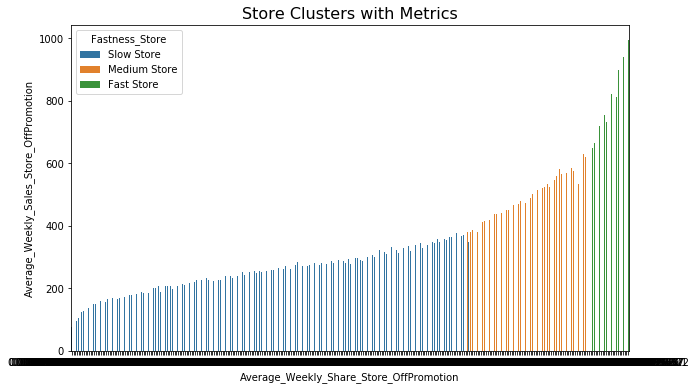

In [40]:
# Visualizin Clusters
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Average_Weekly_Share_Store_OffPromotion', y='Average_Weekly_Sales_Store_OffPromotion', hue='Fastness_Store', data=Merged, ax=ax)
ax.set_title('Store Clusters with Metrics', fontsize=16)
plt.show()

In [41]:
# Adding Store Clusters to Train_Data and Test_Data
Merged=Merged[['StoreCode','Fastness_Store']]
Train_Data=pd.merge(Train_Data,Merged,on='StoreCode',how='left')  #Adding product groups
Test_Data=pd.merge(Test_Data,Merged,on='StoreCode',how='left')  #Adding product groups
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store


In [42]:
Train_Data['Fastness_Store'].fillna('Fast Store', inplace=True)
Test_Data['Fastness_Store'].fillna('Fast Store', inplace=True)
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store


## Product Clustering

In [43]:
Product_Clustering_Data=Train_Data[Train_Data['IsPromotion']==0]
Product_Clustering_Data=Product_Clustering_Data[Product_Clustering_Data['IsReturn']==0]
Product_Clustering_Data=Product_Clustering_Data[['Date','StoreCode','ProductCode','Average_Weekly_Sales_Store_OffPromotion','SalesQuantity']]
Product_Clustering_Data.head()

,Date,StoreCode,ProductCode,Average_Weekly_Sales_Store_OffPromotion,SalesQuantity
1,2015-01-01,131,9,450.500000,1
2,2015-01-01,144,9,166.428571,2
3,2015-01-01,203,9,158.392857,2
4,2015-01-01,256,9,940.571429,0
5,2015-01-01,273,9,183.678571,1


In [44]:
# Getting Week number of dates
Product_Clustering_Data['Week_Number'] = Product_Clustering_Data['Date'].dt.week

In [45]:
Product_Clustering_Data.head()

,Date,StoreCode,ProductCode,Average_Weekly_Sales_Store_OffPromotion,SalesQuantity,Week_Number
1,2015-01-01,131,9,450.500000,1,1
2,2015-01-01,144,9,166.428571,2,1
3,2015-01-01,203,9,158.392857,2,1
4,2015-01-01,256,9,940.571429,0,1
5,2015-01-01,273,9,183.678571,1,1


In [46]:
Product_Clustering_Data=Product_Clustering_Data.groupby(
   ['Week_Number', 'ProductCode']
).agg(
    {
         'SalesQuantity':sum,
         'Average_Weekly_Sales_Store_OffPromotion': "mean" 
    }
)

Product_Clustering_Data = Product_Clustering_Data.reset_index()
Product_Clustering_Data.columns = ['Week_Number','ProductCode','SalesQuantity','Average_Weekly_Sales_Store_OffPromotion']
Product_Clustering_Data.head()

,Week_Number,ProductCode,SalesQuantity,Average_Weekly_Sales_Store_OffPromotion
0,1,1,203,547.012142
1,1,2,117,590.072853
2,1,3,104,440.335930
3,1,4,139,498.237235
4,1,5,163,511.512403


In [47]:
# Transforming data to product level

Product_Clustering_Data=Product_Clustering_Data.groupby(
    ['ProductCode']
).agg(
    {
        'SalesQuantity' : [sum,'mean'],
        'Average_Weekly_Sales_Store_OffPromotion': 'mean'
    }
)
Product_Clustering_Data = Product_Clustering_Data.reset_index()
Product_Clustering_Data.columns = ['ProductCode','Total_Sales_Products','Average_Weekly_Sales_Products_OffPromotion','Average_Weekly_Sales_Store_OffPromotion']
Product_Clustering_Data.head()

,ProductCode,Total_Sales_Products,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,1,9447,337.392857,543.987141
1,2,7115,254.107143,530.380280
2,3,5181,185.035714,529.554425
3,4,6335,226.250000,519.849695
4,5,7633,272.607143,530.818379


In [48]:
ProductWeeklySales=Product_Clustering_Data[['ProductCode','Average_Weekly_Sales_Products_OffPromotion']]
Train_Data=pd.merge(Train_Data,ProductWeeklySales,on='ProductCode',how='left')  #Adding product groups
Test_Data=pd.merge(Test_Data,ProductWeeklySales,on='ProductCode',how='left')
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store,24.857143
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store,24.857143
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store,24.857143
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store,24.857143
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store,24.857143


In [49]:
Product_Clustering_Data['Adjusted_Weekly_Sales'] = Product_Clustering_Data['Average_Weekly_Sales_Products_OffPromotion']/Product_Clustering_Data['Average_Weekly_Sales_Store_OffPromotion']

Product_Clustering_Data=Product_Clustering_Data[['ProductCode','Average_Weekly_Sales_Products_OffPromotion','Average_Weekly_Sales_Store_OffPromotion','Total_Sales_Products','Adjusted_Weekly_Sales']]
Product_Clustering_Data.head()

,ProductCode,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Total_Sales_Products,Adjusted_Weekly_Sales
0,1,337.392857,543.987141,9447,0.620222
1,2,254.107143,530.380280,7115,0.479104
2,3,185.035714,529.554425,5181,0.349418
3,4,226.250000,519.849695,6335,0.435222
4,5,272.607143,530.818379,7633,0.513560


In [50]:
Product_Clustering_Data.describe()

,ProductCode,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Total_Sales_Products,Adjusted_Weekly_Sales
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,157.701299,399.561291,443.590694,11092.191558,0.885677
std,91.916236,965.691423,54.891431,27031.961867,2.186255
min,1.000000,0.000000,187.892857,0.000000,0.000000
25%,78.750000,21.303571,419.862027,596.500000,0.047288
50%,155.500000,181.517857,448.617776,5025.500000,0.403363
75%,238.250000,335.544643,474.224546,9148.000000,0.735426
max,317.000000,10436.392857,662.777005,292219.000000,23.918188


{'whiskers': [<matplotlib.lines.Line2D at 0x27ed79e1d30>,
 'caps': [<matplotlib.lines.Line2D at 0x281392af6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ed79e1be0>],
 'medians': [<matplotlib.lines.Line2D at 0x281392afd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x281392afe48>],
 'means': []}

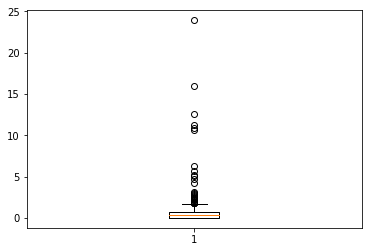

In [969]:
plt.boxplot(Product_Clustering_Data.Adjusted_Weekly_Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x27ed0bbc6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ed0bbcd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ed0bbc278>],
 'medians': [<matplotlib.lines.Line2D at 0x27e8fbaf400>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e8fbaf748>],
 'means': []}

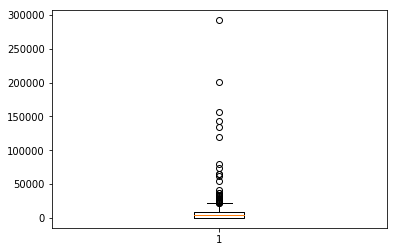

In [970]:
plt.boxplot(Product_Clustering_Data.Total_Sales_Products)

In [51]:
Product_Clustering_Data[Product_Clustering_Data['Total_Sales_Products']>50000]

,ProductCode,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Total_Sales_Products,Adjusted_Weekly_Sales
147,149,4248.964286,389.973453,118971,10.895522
163,166,4782.500000,451.349707,133910,10.595997
164,167,5137.678571,457.357517,143855,11.233397
165,168,7163.535714,447.562255,200579,16.005674
167,170,2311.857143,454.365832,64732,5.088096
200,205,2866.857143,455.724692,80272,6.290765
204,209,2623.964286,461.713488,73471,5.683101
213,218,10436.392857,436.337096,292219,23.918188
214,219,2333.964286,453.392798,65351,5.147775
215,220,2210.250000,467.428692,61887,4.728529


In [52]:
# We will drop that products because they are obivously fast and it will effect clustering range.

Product_Clustering_Data=Product_Clustering_Data[Product_Clustering_Data['Total_Sales_Products']<50000]

In [53]:
Product_Clustering_Data.describe()

,ProductCode,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Total_Sales_Products,Adjusted_Weekly_Sales
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,156.209459,241.297729,443.391996,6656.939189,0.528457
std,93.306257,290.458811,55.850097,8052.490238,0.632357
min,1.000000,0.000000,187.892857,0.000000,0.000000
25%,75.750000,20.486111,418.591402,558.000000,0.044780
50%,150.500000,178.464286,448.147962,4889.500000,0.388700
75%,241.250000,305.726521,475.782746,8325.000000,0.647973
max,317.000000,1486.321429,662.777005,41617.000000,3.133646


In [54]:
# Feature Scaling
Product_Clustering_Data_Fs=Product_Clustering_Data.values
sc = StandardScaler()
Product_Clustering_Data_Fs = sc.fit_transform(Product_Clustering_Data_Fs[:,3:])

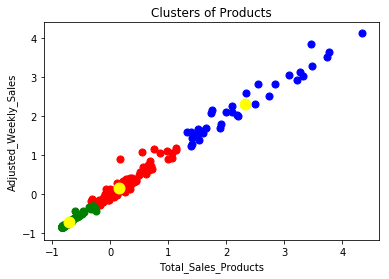

In [55]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(Product_Clustering_Data_Fs)


# Visualising the clusters

plt.scatter(Product_Clustering_Data_Fs[y_kmeans == 0, 0], Product_Clustering_Data_Fs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Product_Clustering_Data_Fs[y_kmeans == 1, 0], Product_Clustering_Data_Fs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Product_Clustering_Data_Fs[y_kmeans == 2, 0], Product_Clustering_Data_Fs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Products')
plt.xlabel('Total_Sales_Products')
plt.ylabel('Adjusted_Weekly_Sales')
#plt.legend()
plt.show()

In [56]:
# Merging CLusters with data

y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
Merged=np.hstack((Product_Clustering_Data, y_kmeans))
Merged=pd.DataFrame(Merged)
Merged.columns=['ProductCode','Average_Weekly_Sales_Products_OffPromotion','Average_Weekly_Sales_Store_OffPromotion','Total_Sales_Products','Adjusted_Weekly_Sales','Cluster']
Merged.head()

,ProductCode,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Total_Sales_Products,Adjusted_Weekly_Sales,Cluster
0,1.0,337.392857,543.987141,9447.0,0.620222,0.0
1,2.0,254.107143,530.380280,7115.0,0.479104,0.0
2,3.0,185.035714,529.554425,5181.0,0.349418,0.0
3,4.0,226.250000,519.849695,6335.0,0.435222,0.0
4,5.0,272.607143,530.818379,7633.0,0.513560,0.0


In [57]:
# Summary of Clusters

Product_Clusters=Merged.groupby(['Cluster']).agg({'ProductCode':'count','Total_Sales_Products':'mean','Average_Weekly_Sales_Products_OffPromotion':'mean','Average_Weekly_Sales_Store_OffPromotion':'mean'})
Product_Clusters = Product_Clusters.reset_index()
Product_Clusters.columns = ['Cluster','Product_Count','Average_Total_Sales_Product','Average_Weekly_Sales_Products_OffPromotion','Average_Weekly_Sales_Store_OffPromotion']
Product_Clusters.head()

,Cluster,Product_Count,Average_Total_Sales_Product,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Store_OffPromotion
0,0.0,126,7836.103175,285.082959,459.408245
1,1.0,34,25294.000000,912.115645,457.857530
2,2.0,136,905.213235,33.027521,424.937029


In [58]:
Merged['Fastness_Product']=np.where(Merged['Cluster']==1,'Fast Product',np.where(Merged['Cluster']==0,'Medium Product','Slow Product'))

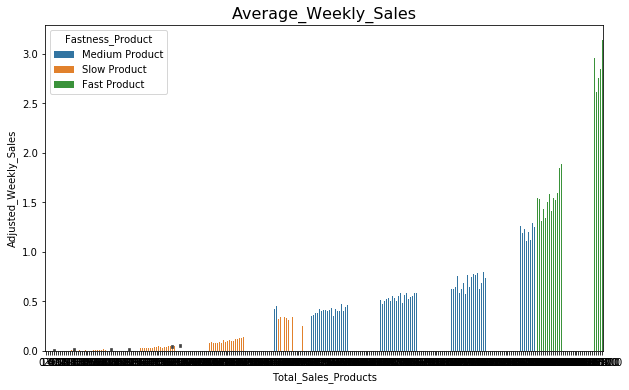

In [59]:
# Visualizin Clusters
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Total_Sales_Products', y='Adjusted_Weekly_Sales', hue='Fastness_Product', data=Merged, ax=ax)
ax.set_title('Average_Weekly_Sales', fontsize=16)
plt.show()

In [60]:
# Adding Product Clusters to Train_Data
Merged=Merged[['ProductCode','Fastness_Product']]
Train_Data=pd.merge(Train_Data,Merged,on='ProductCode',how='left')  #Adding product groups
Test_Data=pd.merge(Test_Data,Merged,on='ProductCode',how='left')
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store,24.857143,Slow Product
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store,24.857143,Slow Product
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store,24.857143,Slow Product
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store,24.857143,Slow Product
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store,24.857143,Slow Product


In [61]:
Train_Data['Fastness_Product'].fillna('Fast Product', inplace=True)
Test_Data['Fastness_Product'].fillna('Fast Product', inplace=True)
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store,24.857143,Slow Product
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store,24.857143,Slow Product
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store,24.857143,Slow Product
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store,24.857143,Slow Product
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store,24.857143,Slow Product


## Promotion Effectiveness

### Products Effects

In [62]:
Promotion_Data=Train_Data[Train_Data['IsPromotion']==1]
Promotion_Data=Promotion_Data[Promotion_Data['IsReturn']==0]
Promotion_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product
506,2015-02-10,6,9,0,H,15,1,0,0,0.003874,479.250000,Medium Store,24.857143,Slow Product
507,2015-02-10,14,9,0,H,15,1,0,0,0.005873,717.214286,Fast Store,24.857143,Slow Product
508,2015-02-10,28,9,0,H,15,1,0,0,0.002401,295.857143,Slow Store,24.857143,Slow Product
509,2015-02-10,45,9,1,H,15,1,0,0,0.000847,104.464286,Slow Store,24.857143,Slow Product
510,2015-02-10,47,9,1,H,15,1,0,0,0.001082,136.285714,Slow Store,24.857143,Slow Product


In [63]:
# Getting Week number of dates
Promotion_Data['Week_Number'] = Promotion_Data['Date'].dt.week

In [64]:
# Transforming data to week-product level

Promotion_Data=Promotion_Data.groupby(
   ['Week_Number', 'ProductCode']
).agg(
    {
         'SalesQuantity':sum,
         'Average_Weekly_Sales_Products_OffPromotion': "mean" 
    }
)

Promotion_Data = Promotion_Data.reset_index()
Promotion_Data.columns = ['Week_Number','ProductCode','Promotion_Sales','Average_Weekly_Sales_Products_OffPromotion']
Promotion_Data.head()

,Week_Number,ProductCode,Promotion_Sales,Average_Weekly_Sales_Products_OffPromotion
0,7,1,345,337.392857
1,7,2,257,254.107143
2,7,3,233,185.035714
3,7,4,258,226.250000
4,7,5,299,272.607143


In [65]:
# Transforming data to product level

Promotion_Data=Promotion_Data.groupby(
   ['ProductCode']
).agg(
    {
         'Promotion_Sales':'sum',
         'Average_Weekly_Sales_Products_OffPromotion': "mean" 
    }
)

Promotion_Data = Promotion_Data.reset_index()
Promotion_Data.columns = ['ProductCode','Promotion_Sales','Average_Weekly_Sales_Products_OffPromotion']
Promotion_Data.head()

,ProductCode,Promotion_Sales,Average_Weekly_Sales_Products_OffPromotion
0,1,1966,337.392857
1,2,1479,254.107143
2,3,1255,185.035714
3,4,1239,226.250000
4,5,1637,272.607143


In [66]:
# Creating Average weekly sales during Promotion metric
Promotion_Data['Average_Weekly_Sales_Products_OnPromotion']=Promotion_Data['Promotion_Sales']/4 # 4 week was promotion applied.
Promotion_Data.head()

,ProductCode,Promotion_Sales,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Products_OnPromotion
0,1,1966,337.392857,491.50
1,2,1479,254.107143,369.75
2,3,1255,185.035714,313.75
3,4,1239,226.250000,309.75
4,5,1637,272.607143,409.25


In [67]:
# Creating Promotion Effect metric

Promotion_Data['Promotion_Effect_Product']=Promotion_Data['Average_Weekly_Sales_Products_OnPromotion']/Promotion_Data['Average_Weekly_Sales_Products_OffPromotion']
Promotion_Data.describe()

,ProductCode,Promotion_Sales,Average_Weekly_Sales_Products_OffPromotion,Average_Weekly_Sales_Products_OnPromotion,Promotion_Effect_Product
count,300.000000,300.000000,299.000000,300.000000,299.000000
mean,158.490000,2708.540000,411.540163,677.135000,1.513244
std,90.801577,6943.244435,977.648852,1735.811109,0.360510
min,1.000000,0.000000,0.125000,0.000000,0.000000
25%,80.750000,161.750000,26.875000,40.437500,1.387889
50%,156.500000,1131.000000,187.535714,282.750000,1.537028
75%,237.250000,2044.250000,341.214286,511.062500,1.668655
max,317.000000,83176.000000,10436.392857,20794.000000,4.000000


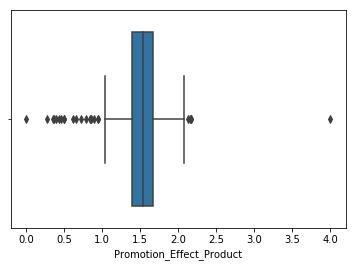

In [68]:
sns.boxplot(Promotion_Data['Promotion_Effect_Product'])

Text(0, 0.5, 'Promotion Effect')

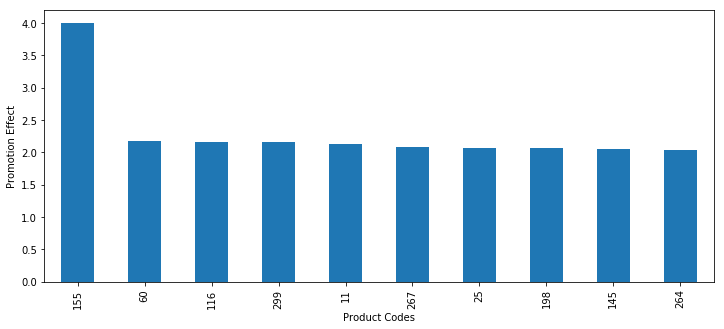

In [69]:
# Displaying Top 20 products that have a high Return/Sales Quantity
fig = plt.figure(figsize=(12,5))
PromotionEffectGraph= Promotion_Data['Promotion_Effect_Product'].nlargest(10).plot(kind='bar')
PromotionEffectGraph.set_xlabel("Product Codes")
PromotionEffectGraph.set_ylabel("Promotion Effect")

In [70]:
# Adding Promotion effectiveness on Products to Train_Data
Promotion_Data=Promotion_Data[['ProductCode','Average_Weekly_Sales_Products_OnPromotion','Promotion_Effect_Product']]

Train_Data=pd.merge(Train_Data,Promotion_Data,on='ProductCode',how='left')
Test_Data=pd.merge(Test_Data,Promotion_Data,on='ProductCode',how='left')
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product,Average_Weekly_Sales_Products_OnPromotion,Promotion_Effect_Product
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store,24.857143,Slow Product,33.0,1.327586
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store,24.857143,Slow Product,33.0,1.327586
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store,24.857143,Slow Product,33.0,1.327586
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store,24.857143,Slow Product,33.0,1.327586
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store,24.857143,Slow Product,33.0,1.327586


## Store Effects

In [71]:
Promotion_Data=Train_Data[Train_Data['IsPromotion']==1]
Promotion_Data=Promotion_Data[Promotion_Data['IsReturn']==0]
Promotion_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product,Average_Weekly_Sales_Products_OnPromotion,Promotion_Effect_Product
506,2015-02-10,6,9,0,H,15,1,0,0,0.003874,479.250000,Medium Store,24.857143,Slow Product,33.0,1.327586
507,2015-02-10,14,9,0,H,15,1,0,0,0.005873,717.214286,Fast Store,24.857143,Slow Product,33.0,1.327586
508,2015-02-10,28,9,0,H,15,1,0,0,0.002401,295.857143,Slow Store,24.857143,Slow Product,33.0,1.327586
509,2015-02-10,45,9,1,H,15,1,0,0,0.000847,104.464286,Slow Store,24.857143,Slow Product,33.0,1.327586
510,2015-02-10,47,9,1,H,15,1,0,0,0.001082,136.285714,Slow Store,24.857143,Slow Product,33.0,1.327586


In [72]:
# Getting Week number of dates
Promotion_Data['Week_Number'] = Promotion_Data['Date'].dt.week

In [73]:
Promotion_Data=Promotion_Data.groupby(
   ['Week_Number', 'StoreCode']
).agg(
    {
         'SalesQuantity':sum,
         'Average_Weekly_Sales_Store_OffPromotion': "mean" 
    }
)

Promotion_Data = Promotion_Data.reset_index()
Promotion_Data.columns = ['Week_Number','StoreCode','Promotion_Sales','Average_Weekly_Sales_Store_OffPromotion']
Promotion_Data.head()

,Week_Number,StoreCode,Promotion_Sales,Average_Weekly_Sales_Store_OffPromotion
0,7,1,463,371.750000
1,7,2,1947,1212.821429
2,7,3,379,244.535714
3,7,4,899,376.857143
4,7,5,488,305.392857


In [74]:
#Adding Weekly Total Sales of whole stores
Weekly_Total_Sales = Promotion_Data['Promotion_Sales'].groupby(Promotion_Data['Week_Number']).transform('sum')


#Adding Share of each store of each week
Promotion_Data['Weekly_Sales_Share']=Promotion_Data['Promotion_Sales']/Weekly_Total_Sales


#Adding Average Share of weekly sales for each store
Promotion_Data['Average_Weekly_Share_Store_OnPromotion'] = Promotion_Data['Weekly_Sales_Share'].groupby(Promotion_Data['StoreCode']).transform('mean')
Promotion_Data=Promotion_Data.drop(['Weekly_Sales_Share'],axis=1)
Promotion_Data.head()

,Week_Number,StoreCode,Promotion_Sales,Average_Weekly_Sales_Store_OffPromotion,Average_Weekly_Share_Store_OnPromotion
0,7,1,463,371.750000,0.002598
1,7,2,1947,1212.821429,0.008577
2,7,3,379,244.535714,0.001380
3,7,4,899,376.857143,0.003267
4,7,5,488,305.392857,0.001939


In [75]:
Promotion_Data=Promotion_Data.groupby(
   ['StoreCode']
).agg(
    {
         'Promotion_Sales':'sum',
         'Average_Weekly_Sales_Store_OffPromotion': "mean",
         'Average_Weekly_Share_Store_OnPromotion':"mean"
    }
)

Promotion_Data = Promotion_Data.reset_index()
Promotion_Data.columns = ['StoreCode','Promotion_Sales','Average_Weekly_Sales_Store_OffPromotion','Average_Weekly_Share_Store_OnPromotion']
Promotion_Data.head()

,StoreCode,Promotion_Sales,Average_Weekly_Sales_Store_OffPromotion,Average_Weekly_Share_Store_OnPromotion
0,1,2272,371.750000,0.002598
1,2,7561,1212.821429,0.008577
2,3,1548,244.535714,0.001380
3,4,2957,376.857143,0.003267
4,5,1927,305.392857,0.001939


In [76]:
Promotion_Data['Average_Weekly_Sales_Store_OnPromotion']=Promotion_Data['Promotion_Sales']/4 # 4 week was promotion applied.
Promotion_Data.head()

,StoreCode,Promotion_Sales,Average_Weekly_Sales_Store_OffPromotion,Average_Weekly_Share_Store_OnPromotion,Average_Weekly_Sales_Store_OnPromotion
0,1,2272,371.750000,0.002598,568.00
1,2,7561,1212.821429,0.008577,1890.25
2,3,1548,244.535714,0.001380,387.00
3,4,2957,376.857143,0.003267,739.25
4,5,1927,305.392857,0.001939,481.75


In [77]:
Promotion_Data['Promotion_Effect_Store']=Promotion_Data['Average_Weekly_Sales_Store_OnPromotion']/Promotion_Data['Average_Weekly_Sales_Store_OffPromotion']
Promotion_Data.describe()

,StoreCode,Promotion_Sales,Average_Weekly_Sales_Store_OffPromotion,Average_Weekly_Share_Store_OnPromotion,Average_Weekly_Sales_Store_OnPromotion,Promotion_Effect_Store
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,170.842262,2418.339286,369.189020,0.003026,604.584821,1.625958
std,98.477615,1529.400087,224.293346,0.001931,382.350022,0.264825
min,1.000000,0.000000,75.428571,0.000000,0.000000,0.000000
25%,85.750000,1475.250000,228.660714,0.001847,368.812500,1.491565
50%,171.500000,1937.500000,294.000000,0.002418,484.375000,1.638912
75%,256.250000,2960.500000,438.312500,0.003524,740.125000,1.798567
max,340.000000,10779.000000,1547.892857,0.014343,2694.750000,2.189593


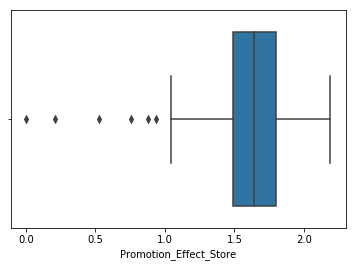

In [78]:
sns.boxplot(Promotion_Data['Promotion_Effect_Store'])

Text(0, 0.5, 'Promotion Effect')

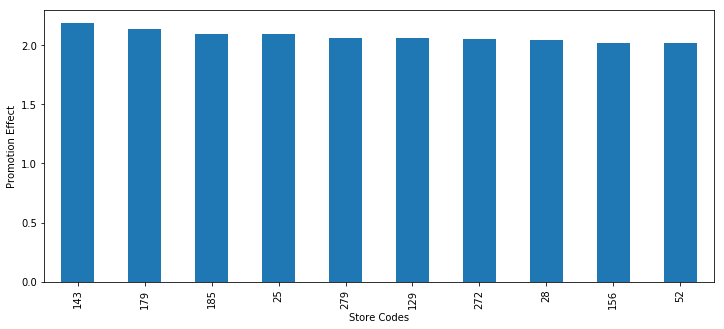

In [79]:
# Displaying Top 20 products that have a high Return/Sales Quantity
fig = plt.figure(figsize=(12,5))
PromotionEffectGraph = Promotion_Data['Promotion_Effect_Store'].nlargest(10).plot(kind='bar')
PromotionEffectGraph.set_xlabel("Store Codes")
PromotionEffectGraph.set_ylabel("Promotion Effect")

In [80]:
# Adding Promotion effectiveness on Stores to Train_Data
Promotion_Data=Promotion_Data[['StoreCode','Promotion_Effect_Store','Average_Weekly_Share_Store_OnPromotion','Average_Weekly_Sales_Store_OnPromotion']]

Train_Data=pd.merge(Train_Data,Promotion_Data,on='StoreCode',how='left')
Test_Data=pd.merge(Test_Data,Promotion_Data,on='StoreCode',how='left')
Train_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product,Average_Weekly_Sales_Products_OnPromotion,Promotion_Effect_Product,Promotion_Effect_Store,Average_Weekly_Share_Store_OnPromotion,Average_Weekly_Sales_Store_OnPromotion
0,2015-01-01,8,9,-1,H,15,0,1,1,0.002362,287.035714,Slow Store,24.857143,Slow Product,33.0,1.327586,1.603459,0.002070,460.25
1,2015-01-01,131,9,1,H,15,0,0,0,0.003670,450.500000,Medium Store,24.857143,Slow Product,33.0,1.327586,2.057159,0.005100,926.75
2,2015-01-01,144,9,2,H,15,0,0,0,0.001381,166.428571,Slow Store,24.857143,Slow Product,33.0,1.327586,1.484120,0.001306,247.00
3,2015-01-01,203,9,2,H,15,0,0,0,0.001284,158.392857,Slow Store,24.857143,Slow Product,33.0,1.327586,1.755130,0.002094,278.00
4,2015-01-01,256,9,0,H,15,0,0,0,0.007656,940.571429,Fast Store,24.857143,Slow Product,33.0,1.327586,1.797843,0.007919,1691.00


In [81]:
# For Last Clustering Question

Train_Data.groupby(
   ['Fastness_Product']
).agg(
    {
         'Promotion_Effect_Product':"mean" 
    }
)

,Promotion_Effect_Product
Fastness_Product,
Fast Product,1.720585
Medium Product,1.515010
Slow Product,1.547345


# Prediction Model

In [83]:
Test_Data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,IsPromotion,IsReturn,ReturnQuantity,Average_Weekly_Share_Store_OffPromotion,Average_Weekly_Sales_Store_OffPromotion,Fastness_Store,Average_Weekly_Sales_Products_OffPromotion,Fastness_Product,Average_Weekly_Sales_Products_OnPromotion,Promotion_Effect_Product,Promotion_Effect_Store,Average_Weekly_Share_Store_OnPromotion,Average_Weekly_Sales_Store_OnPromotion
0,2015-08-01,2,9,1,H,15,0,0,0,0.009872,1212.821429,Fast Store,24.857143,Slow Product,33.0,1.327586,1.558556,0.008577,1890.25
1,2015-08-01,7,9,1,H,15,0,0,0,0.004834,585.285714,Medium Store,24.857143,Slow Product,33.0,1.327586,1.983219,0.005578,1160.75
2,2015-08-01,62,9,1,H,15,0,0,0,0.009200,1116.500000,Fast Store,24.857143,Slow Product,33.0,1.327586,1.544111,0.009056,1724.00
3,2015-08-01,181,9,1,H,15,0,0,0,0.003740,432.928571,Medium Store,24.857143,Slow Product,33.0,1.327586,1.953556,0.004075,845.75
4,2015-08-01,6,20,1,A,6,0,0,0,0.003874,479.250000,Medium Store,202.700000,Medium Product,219.5,1.082881,1.887846,0.004126,904.75


In [84]:
#Missing data
total = Train_Data.isnull().sum().sort_values(ascending=False)
percent = (Train_Data.isnull().sum()/Train_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Promotion_Effect_Product,340,0.000182
Average_Weekly_Sales_Products_OnPromotion,338,0.000180
Average_Weekly_Sales_Products_OffPromotion,6,0.000003
Average_Weekly_Sales_Store_OnPromotion,0,0.000000
IsReturn,0,0.000000


In [85]:
#Missing data
total = Test_Data.isnull().sum().sort_values(ascending=False)
percent = (Test_Data.isnull().sum()/Test_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Promotion_Effect_Product,1250,1.215810e-03
Average_Weekly_Sales_Products_OnPromotion,1250,1.215810e-03
Average_Weekly_Sales_Products_OffPromotion,7,6.808537e-06
Average_Weekly_Sales_Store_OnPromotion,1,9.726482e-07
Average_Weekly_Share_Store_OnPromotion,1,9.726482e-07
Average_Weekly_Sales_Store_OffPromotion,1,9.726482e-07
Average_Weekly_Share_Store_OffPromotion,1,9.726482e-07
Promotion_Effect_Store,1,9.726482e-07
Fastness_Store,0,0.000000e+00
Fastness_Product,0,0.000000e+00


In [86]:
# Filling Null data

Train_Data=Train_Data.dropna()
Test_Data['Promotion_Effect_Product'] = Test_Data['Promotion_Effect_Product'].fillna(Test_Data.groupby('ProductCode')['Promotion_Effect_Product'].transform('mean'))
Test_Data['Promotion_Effect_Product'] = Test_Data['Promotion_Effect_Product'].fillna(Test_Data['Promotion_Effect_Product'].mean())
Test_Data=Test_Data.dropna()

In [87]:
#Missing data

total = Test_Data.isnull().sum().sort_values(ascending=False)
percent = (Test_Data.isnull().sum()/Test_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Average_Weekly_Sales_Store_OnPromotion,0,0.0
ReturnQuantity,0,0.0
StoreCode,0,0.0
ProductCode,0,0.0
SalesQuantity,0,0.0
ProductGroup1,0,0.0
ProductGroup2,0,0.0
IsPromotion,0,0.0
IsReturn,0,0.0
Average_Weekly_Share_Store_OffPromotion,0,0.0


In [88]:
# Gathering Product groups in one column
Train_Data['ProductGroup']=Train_Data['ProductGroup1'].astype(str)+Train_Data['ProductGroup2'].astype(str)
Train_Data=Train_Data.drop(['ProductGroup1','ProductGroup2'], axis=1)

Test_Data['ProductGroup']=Test_Data['ProductGroup1'].astype(str)+Test_Data['ProductGroup2'].astype(str)
Test_Data=Test_Data.drop(['ProductGroup1','ProductGroup2'], axis=1)

In [105]:
# Saving dataframes for report
Train_Data.to_excel("Train_Data.xlsx")
Test_Data.to_excel("Test_Data.xlsx")

In [90]:
# Adjusting Average Weekly metrics if it is in Promotion tange or not

Train_Data['Average_Weekly_Sales_Store']=np.where(Train_Data['IsPromotion']==1,Train_Data['Average_Weekly_Sales_Store_OnPromotion'],Train_Data['Average_Weekly_Sales_Store_OffPromotion'])
Train_Data['Average_Weekly_Share_Store']=np.where(Train_Data['IsPromotion']==1,Train_Data['Average_Weekly_Share_Store_OnPromotion'],Train_Data['Average_Weekly_Share_Store_OffPromotion'])
Train_Data['Average_Weekly_Sales_Products']=np.where(Train_Data['IsPromotion']==1,Train_Data['Average_Weekly_Sales_Products_OnPromotion'],Train_Data['Average_Weekly_Sales_Products_OffPromotion'])

# Dropping Columns
Train_Data=Train_Data.drop(['Average_Weekly_Sales_Store_OnPromotion','Average_Weekly_Share_Store_OnPromotion','Average_Weekly_Sales_Products_OnPromotion','Average_Weekly_Sales_Store_OffPromotion','Average_Weekly_Share_Store_OffPromotion','Average_Weekly_Sales_Products_OffPromotion','Promotion_Effect_Product','Promotion_Effect_Store'], axis=1)



Test_Data['Average_Weekly_Sales_Store']=np.where(Test_Data['IsPromotion']==1,Test_Data['Average_Weekly_Sales_Store_OnPromotion'],Test_Data['Average_Weekly_Sales_Store_OffPromotion'])
Test_Data['Average_Weekly_Share_Store']=np.where(Test_Data['IsPromotion']==1,Test_Data['Average_Weekly_Share_Store_OnPromotion'],Test_Data['Average_Weekly_Share_Store_OffPromotion'])
Test_Data['Average_Weekly_Sales_Products']=np.where(Test_Data['IsPromotion']==1,Test_Data['Average_Weekly_Sales_Products_OnPromotion'],Test_Data['Average_Weekly_Sales_Products_OffPromotion'])

# Dropping Columns
Test_Data=Test_Data.drop(['Average_Weekly_Sales_Store_OnPromotion','Average_Weekly_Share_Store_OnPromotion','Average_Weekly_Sales_Products_OnPromotion','Average_Weekly_Sales_Store_OffPromotion','Average_Weekly_Share_Store_OffPromotion','Average_Weekly_Sales_Products_OffPromotion','Promotion_Effect_Product','Promotion_Effect_Store'], axis=1)


In [91]:
# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
train = Train_Data.sort_values(['Date'],ascending = False)
train_total = train.copy()
test=Test_Data.copy()

# split the last 6 weeks data as hold-out set 
split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.SalesQuantity >0)]
train = train[(train.SalesQuantity >0)]
train_total = train_total[(train_total.SalesQuantity >0)]

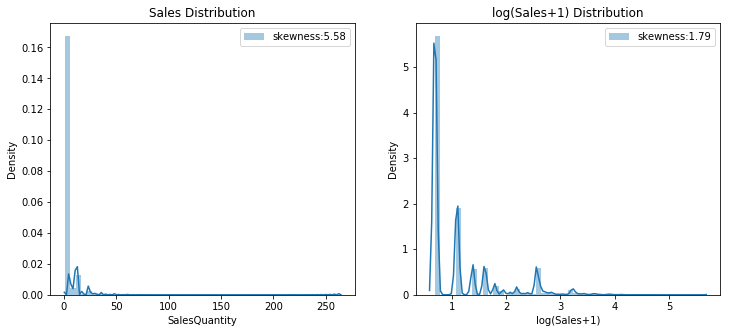

In [92]:
# check distribution of sales in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(train['SalesQuantity'],hist = True,label='skewness:{:.2f}'.format(train['SalesQuantity'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'SalesQuantity', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(train['SalesQuantity']),hist = True,label='skewness:{:.2f}'.format(np.log1p(train['SalesQuantity']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [93]:
# process train and test
def process(data, isTest = False):
    # label encode some features
    data=pd.get_dummies(data,columns=['ProductGroup','Fastness_Product','Fastness_Store'],drop_first=True)
    
    # extract some features from date column  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    data['WeekDay'] = data.Date.dt.weekday
                                                     
    # select the features we need
    data=data.drop(['Date','StoreCode','ProductCode'], axis=1)
    features = data.drop(['SalesQuantity'], axis=1).columns
    
    # Feature Scaling
    #data['Average_Weekly_Share_Store'] = (data['Average_Weekly_Share_Store'] - data['Average_Weekly_Share_Store'].mean())/(data['Average_Weekly_Share_Store'].std())
    #data['Average_Weekly_Sales_Store'] = (data['Average_Weekly_Sales_Store'] - data['Average_Weekly_Sales_Store'].mean())/(data['Average_Weekly_Share_Store'].std())
    #data['Average_Weekly_Sales_Products'] = (data['Average_Weekly_Sales_Products'] - data['Average_Weekly_Sales_Products'].mean())/(data['Average_Weekly_Share_Store'].std())
    
    
    if not isTest:
        features=data.columns
        
    data = data[set(features)]
    
    return data

In [94]:
train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True) 

In [95]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['SalesQuantity']), np.log1p(train['SalesQuantity'])
x_valid, y_valid = valid.drop(columns = ['SalesQuantity']), np.log1p(valid['SalesQuantity'])
x_train_total, y_train_total = train_total.drop(columns = ['SalesQuantity']), np.log1p(train_total['SalesQuantity'])

In [96]:
# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [97]:
#try random forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 1.5628


Text(0.5, 1.0, 'Feature Importance')

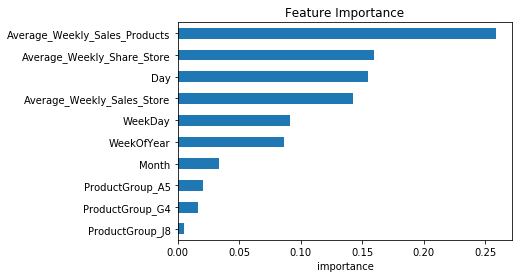

In [98]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [99]:

!pip install xgboost
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gblinear",   # use linear based models 
          "eta": 0.001,   # learning rate
          "max_depth": 12,    # maximum depth of a tree
          "subsample": 1,    # Subsample ratio of the training instances
          "colsample_bytree": 1,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 10, feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:0.91807	eval-rmse:0.867469	train-rmspe:0.591687	eval-rmspe:0.576642
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 10 rounds.
[1]	train-rmse:0.913758	eval-rmse:0.862691	train-rmspe:0.58702	eval-rmspe:0.570904
[2]	train-rmse:0.909961	eval-rmse:0.857984	train-rmspe:0.582427	eval-rmspe:0.565263
[3]	train-rmse:0.90606	eval-rmse:0.853348	train-rmspe:0.57791	eval-rmspe:0.559723
[4]	train-rmse:0.902009	eval-rmse:0.848782	train-rmspe:0.573471	eval-rmspe:0.554287
[5]	train-rmse:0.897961	eval-rmse:0.844288	train-rmspe:0.569111	eval-rmspe:0.548957
[6]	train-rmse:0.894053	eval-rmse:0.839862	train-rmspe:0.56483	eval-rmspe:0.543734
[7]	train-rmse:0.890212	eval-rmse:0.835505	train-rmspe:0.560629	eval-rmspe:0.538621
[8]	train-rmse:0.886413	eval-rmse:0.831215	train-rmspe:0.556509	eval-rmspe:0.533619
[9]	train-rmse:0.882659	eval-rmse:0.826992	train-rmspe:0.552471	eval-rmspe:0.528731
[10]	train-rmse:0.87

In [100]:
# validation
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.4455


Best weight is 0.9500000000000002, RMSPE is 0.4399


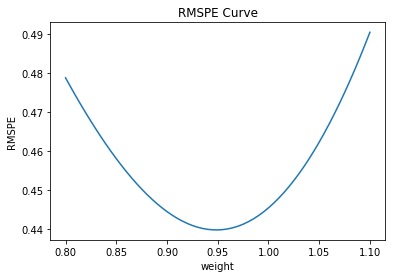

In [101]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.8, 1.1, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_valid), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()

In [102]:
dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

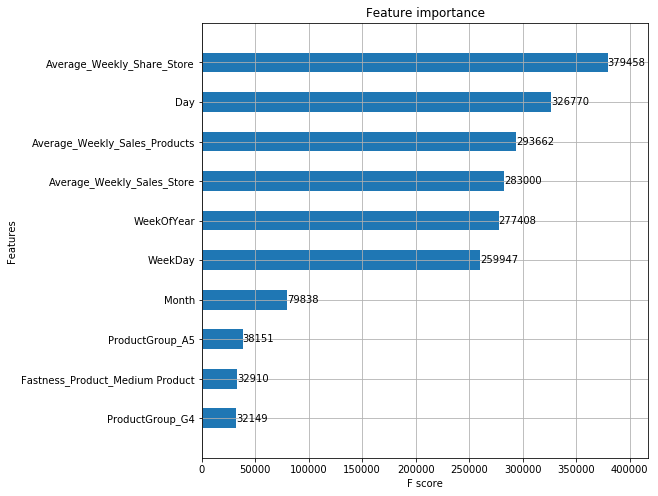

In [1058]:
# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

In [1059]:
# make submission using best weight
Test_Data['Prediction']=np.expm1(preds*0.95)
Test_Data.to_excel("Test_Prediction.xlsx", index=False)